In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_speed = ''
sample_prior = '_mixed_prior_qt'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)
print(sample_prefix)

15000-3000-3sigma_mixed_prior_qt


In [3]:
pickle_path_suffix = "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
underscore_suffix = ''
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix)
file_path = os.path.join(pickle_path+underscore_suffix, pickle_path_suffix+".pkl")

# Load Measurement Pickle and Feed into Results/Plots

In [4]:
# Import saved stacking measurement
simstack_object = SimstackToolbox.import_saved_pickles(file_path)

In [5]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

# Load Saved MCMC Samples

In [6]:
samples_filename = '_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,samples_filename)):
    flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,samples_filename))
else:
    print(os.path.join(pickle_path,samples_filename), 'not found')

# Load Saved LIR Estimates

In [7]:
# Load LIR results
lir_filename = '_'.join(['lir',sample_prefix,'dict'])+'.pkl'
lir_path = os.path.join(pickle_path,lir_filename)
if os.path.isfile(lir_path):
    lir_dict = SimstackToolbox.import_saved_pickles(lir_path)
else:
    print("Can't find "+lir_path)

# Load Saved LIR Density Estimates

In [8]:
# Load LIRD results
lird_filename = '_'.join(['lird',sample_prefix,'dict'])+'.pkl'
lird_path = os.path.join(pickle_path,lird_filename)
if os.path.isfile(lird_path):
    lird_dict = SimstackToolbox.import_saved_pickles(lird_path)
else:
    print("Can't find "+lird_path)

# Load Saved Total LIR Density Estimates

In [9]:
# Load LIRD results
tlird_filename = '_'.join(['total_lird',sample_prefix,'dict'])+'.pkl'
tlird_path = os.path.join(pickle_path,tlird_filename)
if os.path.isfile(tlird_path):
    total_lird_dict = SimstackToolbox.import_saved_pickles(tlird_path)
else:
    print("Can't find "+tlird_path)

# Load Saved SFR Estimates

In [10]:
# Load SFR results
sfr_filename = '_'.join(['sfr',sample_prefix,'dict'])+'.pkl'
sfr_path = os.path.join(pickle_path,sfr_filename)
if os.path.isfile(sfr_path):
    sfr_dict = SimstackToolbox.import_saved_pickles(sfr_path)
else:
    print("Can't find "+sfr_path)

# Load Saved SFR Density Estimates

In [11]:
# Load SFRD results
sfrd_filename = '_'.join(['sfrd',sample_prefix,'dict'])+'.pkl'
sfrd_path = os.path.join(pickle_path,sfrd_filename)
if os.path.isfile(sfrd_path):
    sfrd_dict = SimstackToolbox.import_saved_pickles(sfrd_path)
else:
    print("Can't find "+sfrd_path)

# Load Saved Total SFR Density Estimates

In [12]:
# Load LIRD results
tsfrd_filename = '_'.join(['total_sfrd',sample_prefix,'dict'])+'.pkl'
tsfrd_path = os.path.join(pickle_path,tsfrd_filename)
if os.path.isfile(tsfrd_path):
    total_sfrd_dict = SimstackToolbox.import_saved_pickles(tsfrd_path)
else:
    print("Can't find "+tsfrd_path)

# Start Plotting

## Plot SEDs

### With Quiescent Galaxies

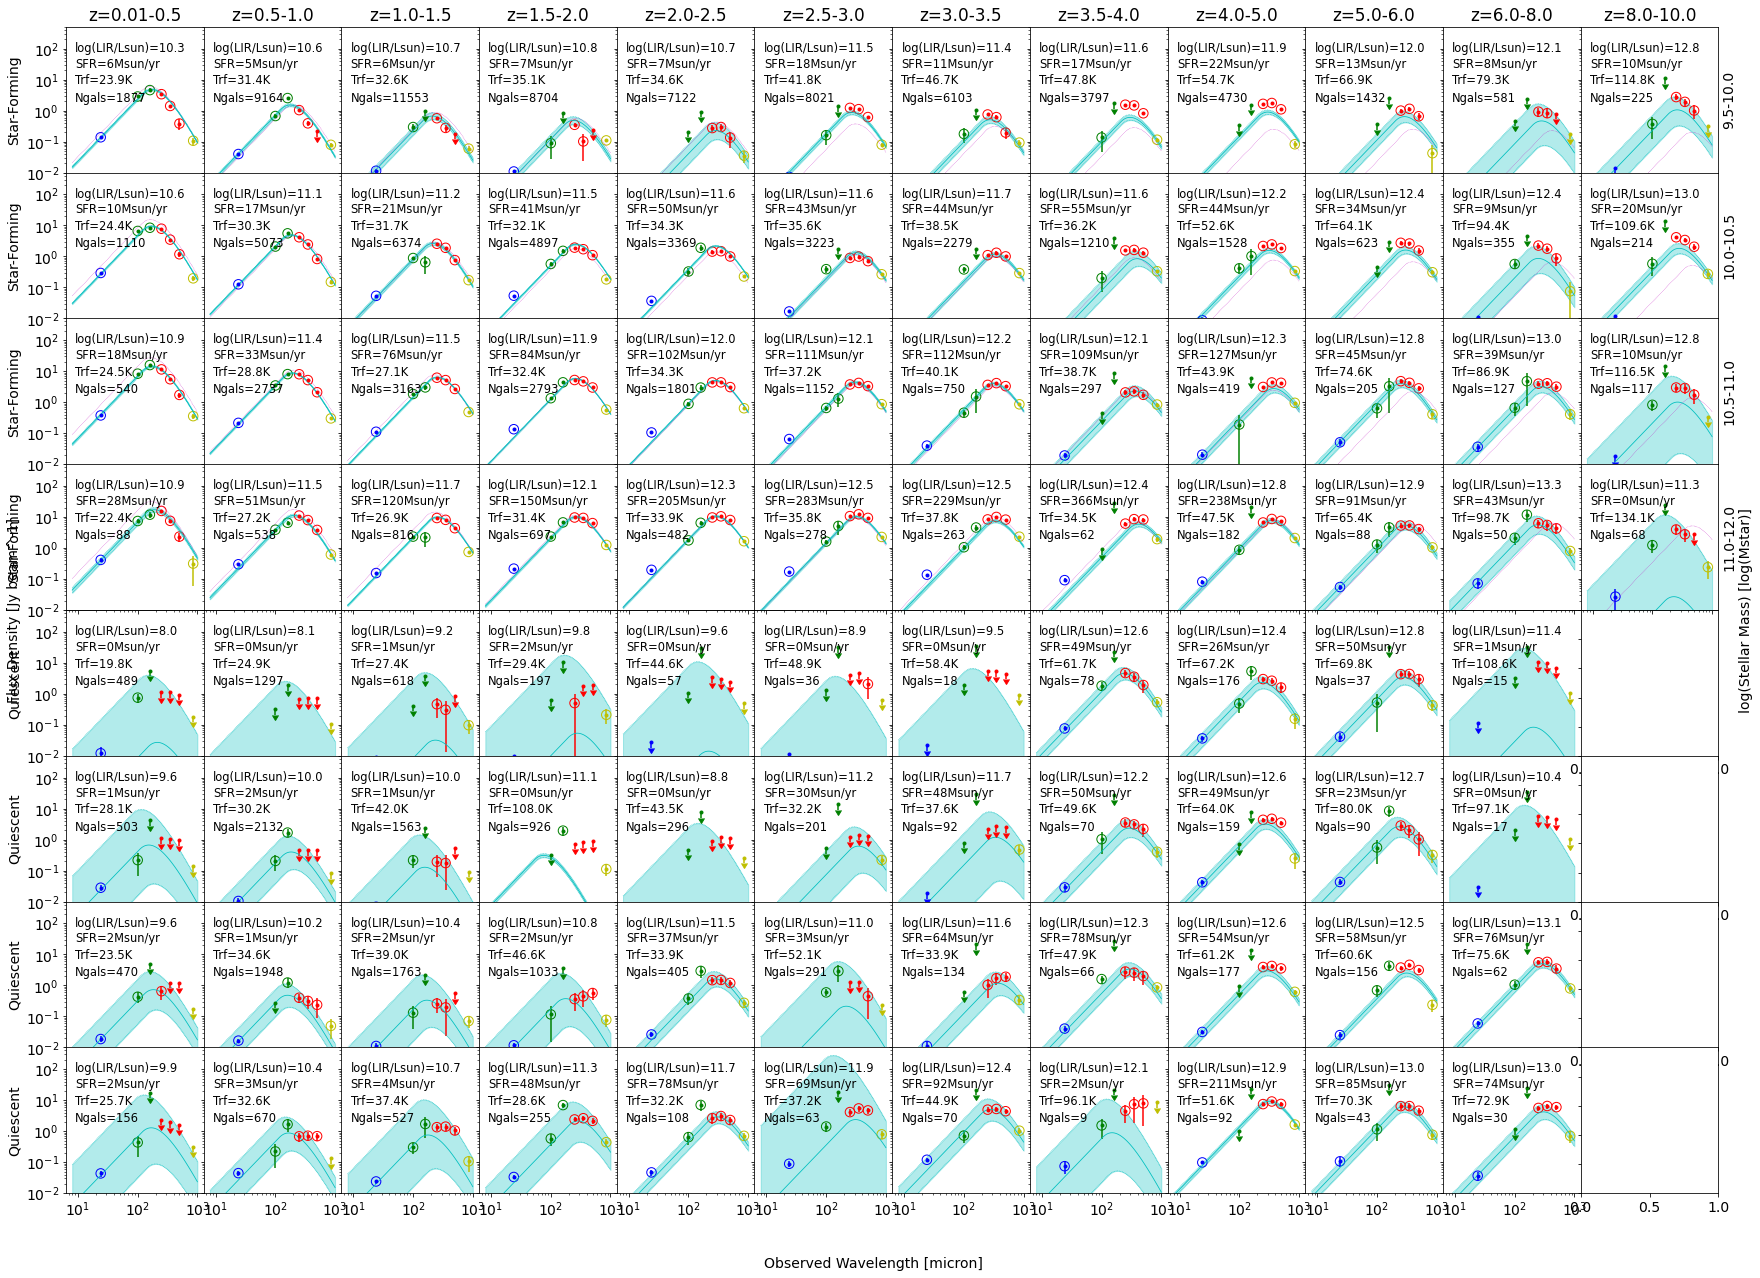

In [14]:
show_qt = True
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="SEDs_"+sample_prefix+"_All.pdf"
simstack_object.plot_mcmc_seds(flat_samples_dict, show_qt=show_qt, bootstrap_dict=None, errors=('25', '75'),save_path=fig_path,save_filename=fig_filename)

### Only Star-Forming Galaxies

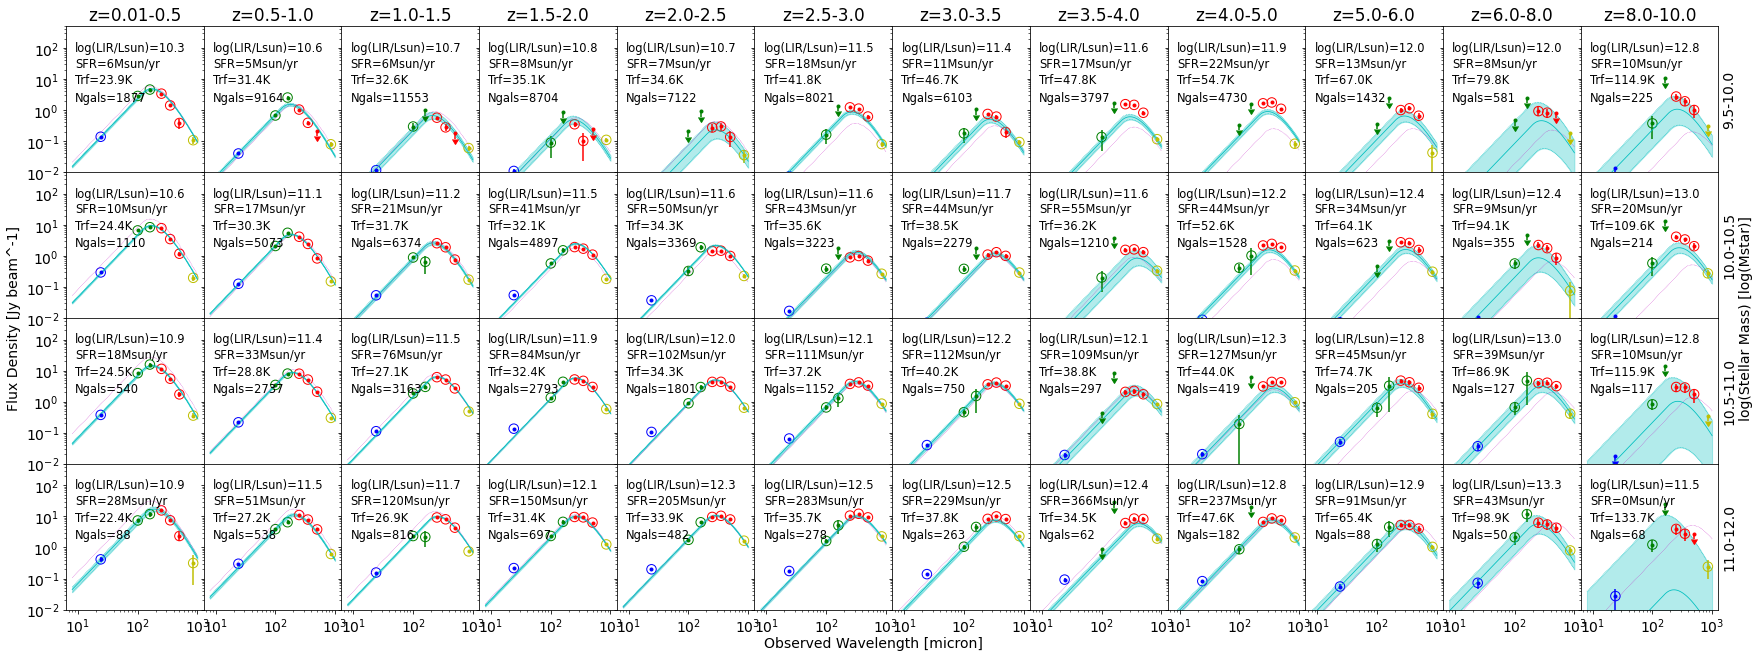

In [15]:
show_qt = False
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="SEDs_"+sample_prefix+"_SFGs.pdf"
simstack_object.plot_mcmc_seds(flat_samples_dict, show_qt=show_qt, bootstrap_dict=None, errors=('25', '75'),save_path=fig_path,save_filename=fig_filename)

## Plot LIR and SFR Density

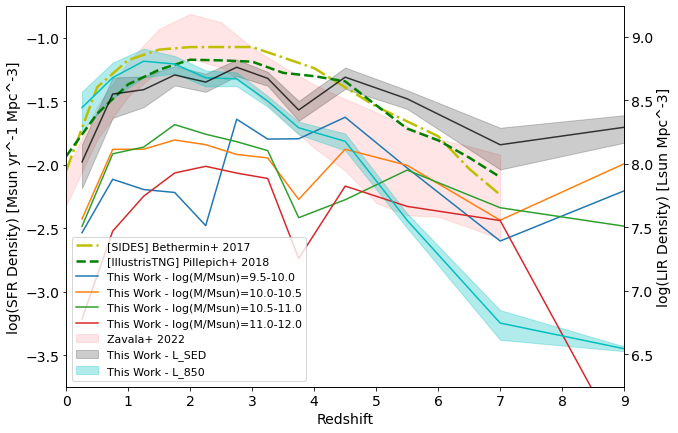

In [13]:
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="SFRD_"+sample_prefix+".pdf"
simstack_object.plot_total_sfrd(total_sfrd_dict, save_path=fig_path, save_filename=fig_filename)

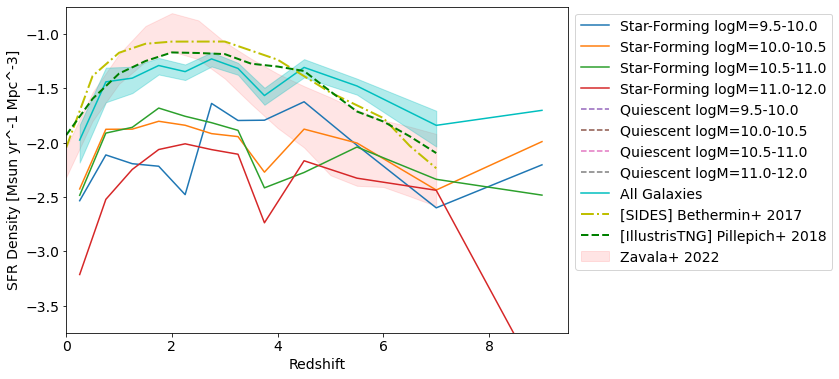

In [14]:
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="LIRD_"+sample_prefix+".pdf"
simstack_object.plot_total_lird(total_lird_dict, save_path=fig_path, save_filename=fig_filename)

## Plot Rest-Frame Dust Temperature

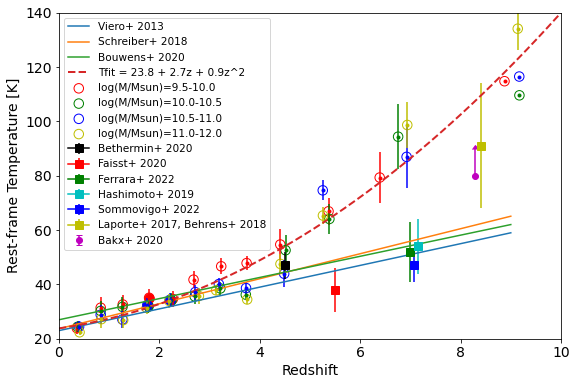

In [14]:
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1']
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="Tdust_"+sample_prefix+".pdf"
simstack_object.plot_rest_frame_temperature(lir_dict,  xlim=[0, 10], ylim=[2e1, 140],  ylog=False, not_flat_prior=not_flat_prior,print_values=False, save_path=fig_path,save_filename=fig_filename)

## Plot Star-Forming Main-Sequence (SFR vs. Stellar Mass vs. z)

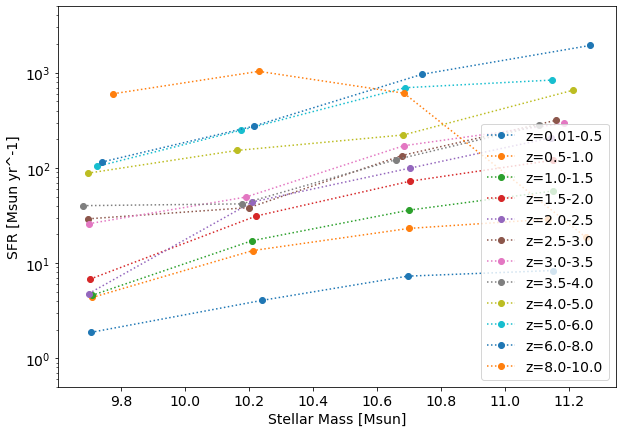

In [15]:
# Plot Star-Forming Main Sequence
simstack_object.plot_star_forming_main_sequence(lir_dict, ylim=[5e-1, 5e3])

## Plot CIB

In [21]:
# Pass saved results into SimstackResults
from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
path_ini_file = os.path.join(pickle_path+underscore_suffix, "cosmos2020_farmer.ini")
simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)
simstack_object = SimstackResults(simstack_object)

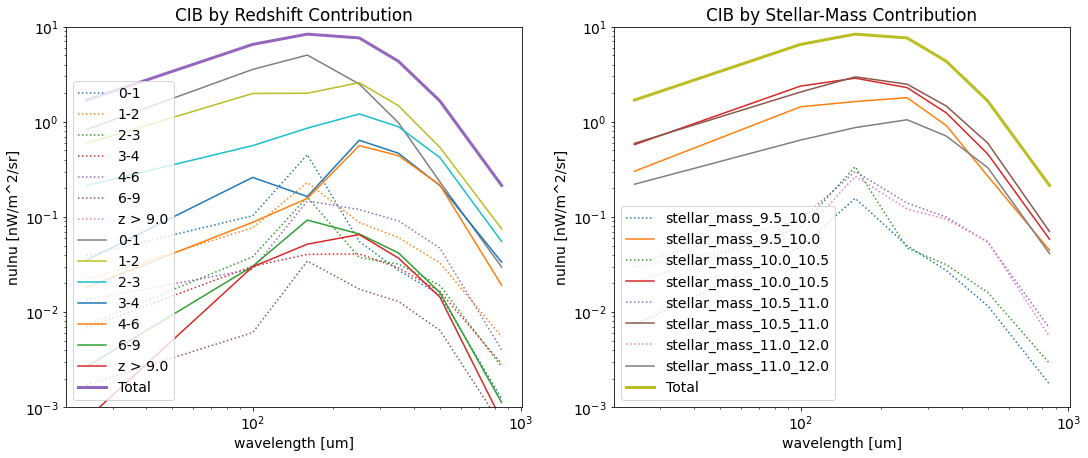

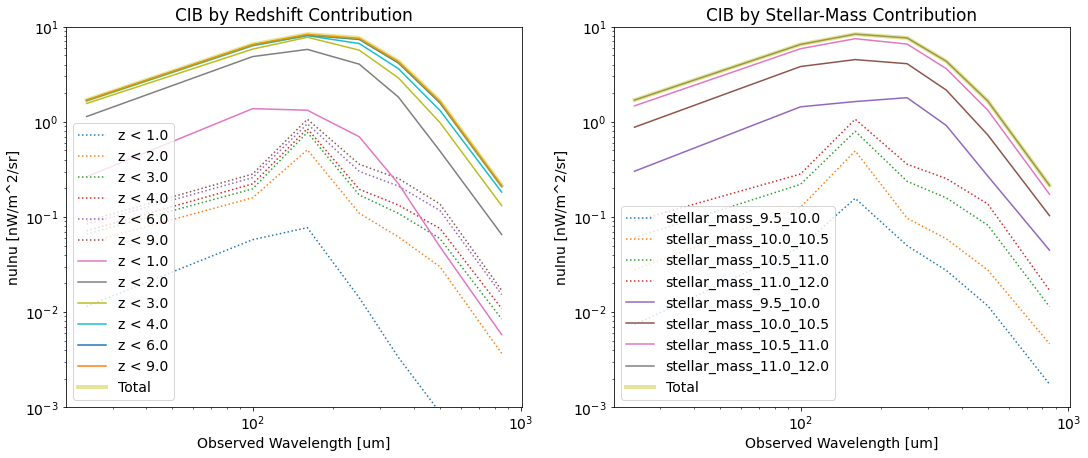

In [22]:
# ESTIMATE CIB
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)
cosmos_area_deg2 = 1.6055  # deg2
cib_dict = simstack_object.estimate_cib(simstack_object.results_dict['sed_bootstrap_results_dict'], cosmos_area_deg2)
# PLOT CIB
simstack_object.plot_cib(cib_dict)
# PLOT Cumulative CIB 
simstack_object.plot_cib_layers(cib_dict, show_total=True)